# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
latitudes=np.append(lats,18.137907)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
longitudes=np.append(lngs,-94.137667)
lat_lngs = zip(latitudes, longitudes)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

632


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Lists of atributes
name=[]
cloud=[]
country=[]
date=[]
humidity=[]
latitude=[]
longitude=[]
max_temp=[]
wind_speed=[]
not_found=[]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

record=1
error=1

print("Beggining data retrieval")
print("-------------------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        record = record+1
    except KeyError:
        not_found.append(city)
        print(f"City not found. {error} error(s). Skipping...")
        error=error+1
        
print("-------------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------------")

Beggining data retrieval
-------------------------------------------
Processing Record 1 | ushuaia
City not found. 1 error(s). Skipping...
Processing Record 2 | upernavik
Processing Record 3 | cape town
Processing Record 4 | arraial do cabo
Processing Record 5 | atuona
City not found. 2 error(s). Skipping...
Processing Record 6 | lasa
Processing Record 7 | kudymkar
Processing Record 8 | bilibino
Processing Record 9 | bayburt
Processing Record 10 | rikitea
Processing Record 11 | codrington
Processing Record 12 | alice springs
City not found. 3 error(s). Skipping...
Processing Record 13 | port elizabeth
Processing Record 14 | butaritari
Processing Record 15 | fort dodge
Processing Record 16 | tukrah
Processing Record 17 | shihezi
Processing Record 18 | khatanga
Processing Record 19 | hilo
Processing Record 20 | tiksi
Processing Record 21 | lubao
City not found. 4 error(s). Skipping...
Processing Record 22 | solnechnyy
Processing Record 23 | starozhilovo
Processing Record 24 | port alfred

City not found. 26 error(s). Skipping...
Processing Record 219 | krasnoselkup
City not found. 27 error(s). Skipping...
Processing Record 220 | ingham
City not found. 28 error(s). Skipping...
Processing Record 221 | itarema
Processing Record 222 | vila franca do campo
Processing Record 223 | nchelenge
Processing Record 224 | stamford
Processing Record 225 | port hueneme
Processing Record 226 | colac
Processing Record 227 | saldanha
Processing Record 228 | nelson
Processing Record 229 | quelimane
Processing Record 230 | surt
Processing Record 231 | hasaki
Processing Record 232 | pangnirtung
Processing Record 233 | nome
Processing Record 234 | plettenberg bay
Processing Record 235 | dhidhdhoo
Processing Record 236 | prudentopolis
Processing Record 237 | russellville
Processing Record 238 | bathsheba
Processing Record 239 | angoche
Processing Record 240 | kathu
Processing Record 241 | challapalle
Processing Record 242 | fallon
Processing Record 243 | mayo
Processing Record 244 | nantucket


Processing Record 448 | vestmanna
Processing Record 449 | sao filipe
City not found. 40 error(s). Skipping...
Processing Record 450 | filotion
Processing Record 451 | wagar
Processing Record 452 | bogorodskoye
Processing Record 453 | caravelas
Processing Record 454 | el tocuyo
Processing Record 455 | lanzhou
Processing Record 456 | buchanan
Processing Record 457 | cabedelo
City not found. 41 error(s). Skipping...
Processing Record 458 | nastola
Processing Record 459 | mawlaik
Processing Record 460 | noumea
Processing Record 461 | eydhafushi
Processing Record 462 | goderich
Processing Record 463 | arth
Processing Record 464 | san andres
Processing Record 465 | shahrud
Processing Record 466 | najran
Processing Record 467 | ukiah
Processing Record 468 | aswan
Processing Record 469 | rundu
Processing Record 470 | tual
Processing Record 471 | kruisfontein
Processing Record 472 | havelian
Processing Record 473 | college
Processing Record 474 | lagoa
Processing Record 475 | voyvozh
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(r'..\Output\Weather_Data.csv', index = False)

weather_data.count()

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Lng           582
Max Temp      582
Wind Speed    582
dtype: int64

In [5]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1585710920,75,-54.80,-68.30,8.00,3.10
1,Upernavik,85,GL,1585711150,87,72.79,-56.15,-20.18,6.13
2,Cape Town,20,ZA,1585710900,67,-33.93,18.42,17.22,8.70
3,Arraial do Cabo,12,BR,1585710888,83,-22.97,-42.03,24.77,3.64
4,Atuona,1,PF,1585711151,80,-9.80,-139.03,27.78,6.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

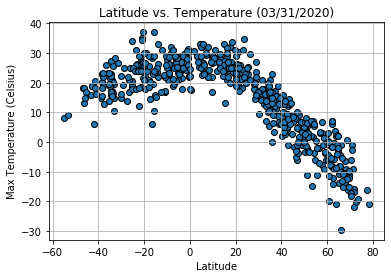

In [16]:
analysis_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title(f'Latitude vs. Temperature ({analysis_date})')
plt.grid()
plt.savefig(f'../Output/LatVTemp.png')
plt.show()


#### Latitude vs. Humidity Plot

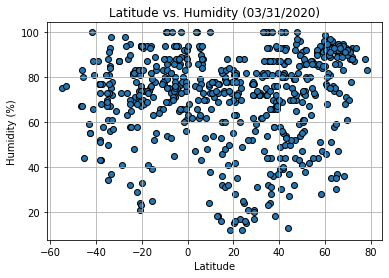

In [17]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity ({analysis_date})')
plt.grid()
plt.savefig(f'../Output/LatVHum.png')
plt.show()

#### Latitude vs. Cloudiness Plot

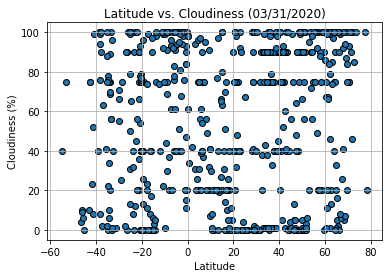

In [18]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness ({analysis_date})')
plt.grid()
plt.savefig(f'../Output/LatVCloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

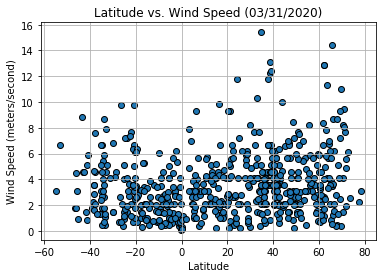

In [19]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/second)')
plt.title(f'Latitude vs. Wind Speed ({analysis_date})')
plt.grid()
plt.savefig(f'../Output/LatVWndSpd.png')
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def reglin(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rval=f'r value = {"{:.2f}".format(rvalue)}'
    return regress_values,line_eq,rval 

In [21]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi=weather_data[weather_data['Lat']>=0]
south_hemi=weather_data[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

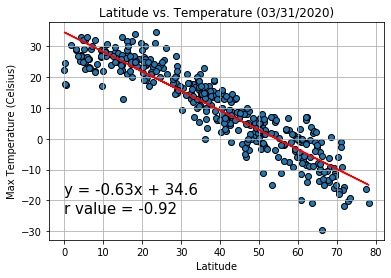

In [22]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Max Temp'])
plt.scatter(north_hemi['Lat'],north_hemi['Max Temp'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title(f'Latitude vs. Temperature ({analysis_date})')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(0,-18),fontsize=15,color="black")
plt.annotate(rval,(0,-24),fontsize=15,color="black")
plt.savefig(f'../Output/NorthLatVTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

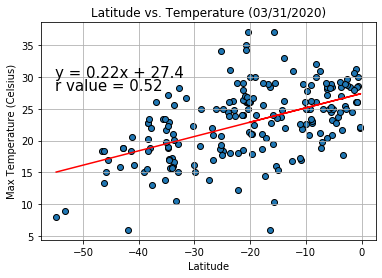

In [23]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Max Temp'])
plt.scatter(south_hemi['Lat'],south_hemi['Max Temp'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title(f'Latitude vs. Temperature ({analysis_date})')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="black")
plt.annotate(rval,(-55,28),fontsize=15,color="black")
plt.savefig(f'../Output/SouthLatVTemp.png')
plt.show()

Watching this particular 2 graphs the northern hemisphere has a more visible trend than the southern one. This can be noticed in the rvalue because the rvalue of the northern hemisphere is closer to 1 than the southern one (0.52). This means that we are more likely to predict the temperature based on the latitude (or backwards) by using the line equation in the northern hemisphere than in the southern. This could be due to the randonmness of the dataset, maybe we dont have enough points in the southern hemisphere to get a more visible trend.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

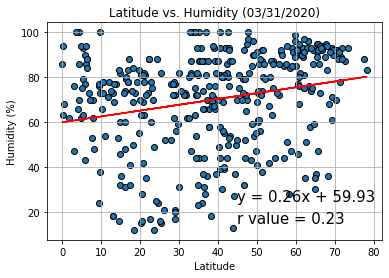

In [24]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Humidity'])
plt.scatter(north_hemi['Lat'],north_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity ({analysis_date})')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(45,25),fontsize=15,color="black")
plt.annotate(rval,(45,15),fontsize=15,color="black")
plt.savefig(f'../Output/NorthLatVHum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

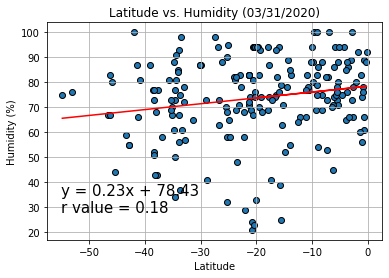

In [25]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Humidity'])
plt.scatter(south_hemi['Lat'],south_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity ({analysis_date})')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-55,35),fontsize=15,color="black")
plt.annotate(rval,(-55,28),fontsize=15,color="black")
plt.savefig(f'../Output/SouthLatVHum.png')
plt.show()

In both of these graphs the rvalue is very low wich leads us to think that the linear regression is not the best method to apply to this data. It is very visible that the data is really dispersed across the graphs and doesnt show a really direct relation between the latitude and the humidity. This could happen because other factors are more important to determine the humidity in a city than the latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

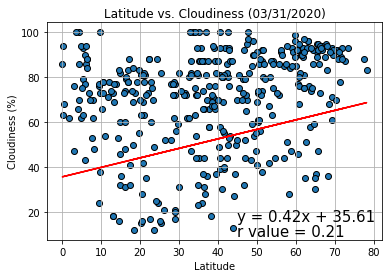

In [26]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Cloudiness'])
plt.scatter(north_hemi['Lat'],north_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness ({analysis_date})')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(45,16),fontsize=15,color="black")
plt.annotate(rval,(45,9),fontsize=15,color="black")
plt.savefig(f'../Output/NorthLatVCloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

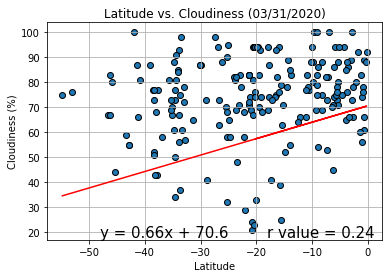

In [27]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Cloudiness'])
plt.scatter(south_hemi['Lat'],south_hemi['Humidity'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness ({analysis_date})')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-48,18),fontsize=15,color="black")
plt.annotate(rval,(-18,18),fontsize=15,color="black")
plt.savefig(f'../Output/SouthLatVCloud.png')
plt.show()

In these two graphs we have a similar case to the previous graphs: they have low rvalues that show a weak relation between the variables, the data is dispersed and there is not a strong trend

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

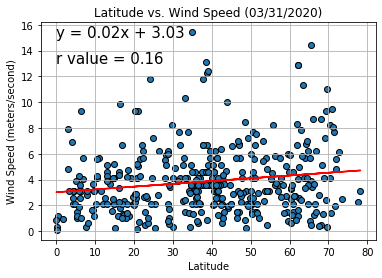

In [30]:
regress_values,line_eq,rval=reglin(north_hemi['Lat'],north_hemi['Wind Speed'])
plt.scatter(north_hemi['Lat'],north_hemi['Wind Speed'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/second)')
plt.title(f'Latitude vs. Wind Speed ({analysis_date})')
plt.grid()
plt.plot(north_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(0,15),fontsize=15,color="black")
plt.annotate(rval,(0,13),fontsize=15,color="black")
plt.savefig(f'../Output/NorthLatVWndSpd.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

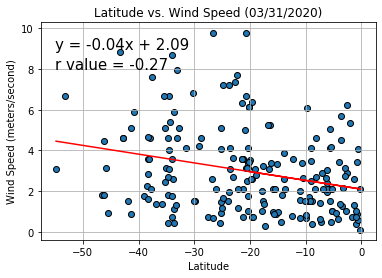

In [31]:
regress_values,line_eq,rval=reglin(south_hemi['Lat'],south_hemi['Wind Speed'])
plt.scatter(south_hemi['Lat'],south_hemi['Wind Speed'],edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/second)')
plt.title(f'Latitude vs. Wind Speed ({analysis_date})')
plt.grid()
plt.plot(south_hemi['Lat'],regress_values,"r")
plt.annotate(line_eq,(-55,9),fontsize=15,color="black")
plt.annotate(rval,(-55,8),fontsize=15,color="black")
plt.savefig(f'../Output/SouthLatVWndSpd.png')
plt.show()

At plain sight, we can see that in the northern hemisphere we have a line that is almost horizontal, which tells us that the wind speed is almost the same, but when we see the rvalue, we can understand that it is not the best aproximation based on all the data. On the other hand the southern hemisphere has a higher rvalue that the northern one, but it is still too low to get a good aproximation.

Watching all of the graphs we can see that the points in the norther hemisphere are more evenly distributed all across the hemisphere latitudes, while in the southern the data tends to group in the latitudes near the Equator. This can be happening due to the randomness of the coordinates used to get the nearest city. Another explanation could be that there are more cities all across the northern hemisphere (were land almost gets to the north pole) 